In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# OBSERVATION DATA
forcens = pd.read_csv("~/Science/lgm_foram_census/tidy/forcens_sp_a_wsst.csv")
lgm = pd.read_csv("~/Science/lgm_foram_census/tidy/lgm_sp_a_wsst.csv")

B. digitata 5.0
B. digitata 5.0
C. nitida 7.0
C. nitida 3.0
D. anfracta 6.199999999999999
D. anfracta 3.0
G. adamsi 1.0
G. adamsi 4.0
G. bulloides 142.25
G. bulloides 113.0
G. calida 17.5
G. calida 13.0
G. conglobatus 12.349999999999966
G. conglobatus 13.0
G. conglomerata 23.0
G. conglomerata 12.949999999999932
G. crassaformis 21.649999999999977
G. crassaformis 9.0
G. cultrata 37.0
G. cultrata 44.0
G. eastropacia 18.950000000000003
G. eastropacia 4.0
G. falconensis 32.0
G. falconensis 33.0
G. glutinata 77.19999999999993
G. glutinata 89.0
G. hexagonus 9.0
G. hexagonus 8.0
G. hirsuta 10.0
G. hirsuta 14.0
G. inflata 92.0
G. inflata 106.0
G. ruber albus 174.0
G. ruber albus 175.0
G. ruber ruber 42.0
G. ruber ruber 38.0
G. rubescens 22.25
G. rubescens 12.0
G. scitula 55.0
G. scitula 9.0
G. siphonifera 24.0
G. siphonifera 29.0
G. tenellus 11.0
G. tenellus 17.0
G. truncatulinoides 48.0
G. truncatulinoides 33.0
G. tumida 9.0
G. tumida 21.0
H. pelagica 9.049999999999999
H. pelagica 5.0
N. duter

/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/pr

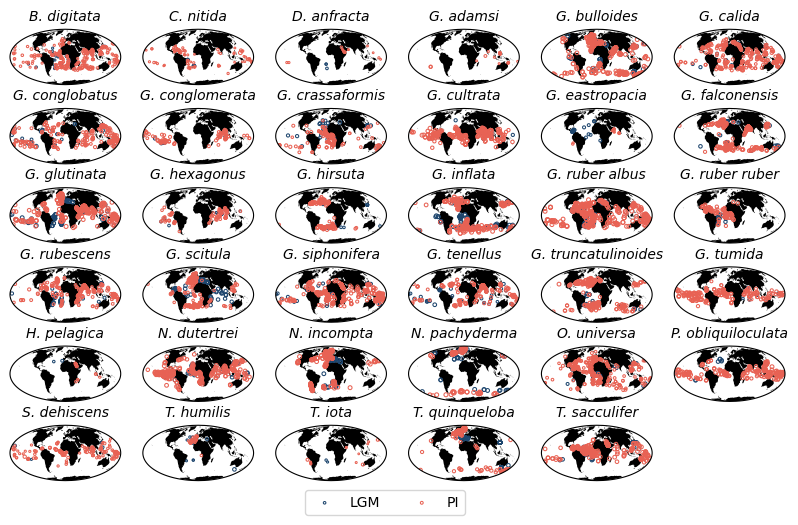

In [2]:
## write a function to filter species
def sp_opt_sub(df, species):
    ## select latitudes, longitudes and species columns
    df_sub = df[['Latitude','Longitude',species, "SST"]]
    ## remove zeros
    df_sub_wo_zero = df_sub[df_sub[species] != 0]
    q = np.nanpercentile(df_sub_wo_zero[species], 85)
    print(species, q)
    df_sub = df_sub[df_sub[species] >= q]

    return df_sub

## write a function to plot optimal niche, just occurence
def plot_opt_niche(ax, df, species, **kwargs):
    ## select latitudes, longitudes and species columns
    df_sub = sp_opt_sub(df, species)
    ## plot
    ax.scatter(df_sub.Longitude, df_sub.Latitude,
               s = np.log2(df_sub[species]),
               facecolors='none',
               transform=ccrs.PlateCarree(), **kwargs)
    return ax

## do this for multiple species
fig, axes = plt.subplots(nrows=6, ncols=6,
                         figsize=(10, 6),
                         subplot_kw=dict(projection=ccrs.Mollweide()))

topt = pd.read_csv("../data/Topt_sp_lgm.csv")
species_list = topt.species
from cartopy.feature import LAND
for i, ax in enumerate(axes.flat):
    ## add coastlines
    ax.set_global()
    ## add land mask
    ax.add_feature(LAND, facecolor="black")
    ax.set_title(species_list[i], style='italic', fontfamily='sans-serif', fontsize=10)

    plot_opt_niche(ax, lgm, species_list[i], label="LGM",
                   edgecolors="#1e466e",
                    linewidth=0.75)
    
    plot_opt_niche(ax, forcens, species_list[i], label="PI",
                   edgecolors="#e86254",
                    linewidth=0.75)

    ## if exceed the number of species, break
    if i == len(species_list) - 1:
        break

## remove unused axes
for ax in axes.flat[i+1:]:
    ax.remove()

## legend
#fig.legend(["LGM", "PI"], loc="lower center", ncol=1, bbox_to_anchor=(0.58, 0.13))
fig.legend(["LGM", "PI"], loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.05))

## save the fig
fig.savefig("../output/opt_niche_change.png", dpi=300, bbox_inches='tight')